In this file I attempt to find respecting record in ACMS (input) dataset for each report in output dataset

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
acms = pd.read_csv('./data/neo_takeoff_202403250023.csv', parse_dates=['reportts'], low_memory=False) \
    .drop(columns=[
        'processedts', 
    ])

acnum = 'VQ-BDU'
# takeoff_reportname = 'A320 ENGINE TAKE OFF REPORT'
takeoff_reportname = 'A321 ENGINE TAKE OFF REPORT'

acms = acms[(acms['acnum'] == acnum) & (acms['reportname'] == takeoff_reportname)] \
    .drop(columns=['reportname']) \
    .set_index('reportts') \
    .sort_index()

acms

,acnum,pos,fltdes,dep,arr,pf,wai,nai,prv,hpv,...,tol,tr,ttp,vb1,vb2,vorrc,vorv,votm,vsva,w14
reportts,,,,,,,,,,,,,,,,,,,,,
2018-06-27 13:23:43,VQ-BDU,1,9992.0,EDHI,UUDD,0.53,0.0,0.0,1.0,0.0,...,NaN,NaN,31.0,0.4,0.5,58.0,NaN,NaN,0.808,1225.0
2018-06-27 13:23:43,VQ-BDU,2,9992.0,EDHI,UUDD,0.53,0.0,0.0,1.0,0.0,...,NaN,NaN,32.0,0.5,0.2,59.3,NaN,NaN,0.796,1207.0
2018-06-28 19:31:29,VQ-BDU,1,778.0,UUDD,UIII,0.51,0.0,0.0,1.0,0.0,...,NaN,NaN,64.0,0.5,0.6,56.7,NaN,NaN,0.806,1197.0
2018-06-28 19:31:29,VQ-BDU,2,778.0,UUDD,UIII,0.51,0.0,0.0,1.0,0.0,...,NaN,NaN,63.0,0.6,0.2,56.6,NaN,NaN,0.805,1195.0
2018-06-29 02:41:24,VQ-BDU,2,777.0,UIII,UUDD,0.50,0.0,0.0,1.0,0.0,...,NaN,NaN,0.0,0.6,0.3,61.0,NaN,NaN,0.814,1138.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-21 01:53:23,VQ-BDU,2,5250.0,UHPP,UNNT,0.53,0.0,1.0,1.0,0.0,...,NaN,NaN,37.0,0.1,0.4,53.1,NaN,NaN,0.782,1243.0
2022-04-21 16:18:06,VQ-BDU,2,5261.0,UNNT,UEEE,0.53,0.0,1.0,1.0,0.0,...,NaN,NaN,0.0,0.1,0.2,53.7,NaN,NaN,0.788,1251.0
2022-04-21 16:18:06,VQ-BDU,1,5261.0,UNNT,UEEE,0.53,0.0,1.0,1.0,0.0,...,NaN,NaN,0.0,0.2,0.4,54.4,NaN,NaN,0.786,1248.0


In [27]:
egtm_raw = pd.read_csv('./data/EGTM.csv', parse_dates=['RECORDED_DT']) \
    .drop(columns=['ESN']) \
    .rename(columns={
        'AIRCRAFT': 'acnum',
        'POSITION': 'pos',
        'RECORDED_DT': 'recorded_dt',
        'RWCTOMAR': 'egtm'
    }) \
    .loc[:, :'egtm']

egtm_raw['recorded_dt'] = pd.to_datetime(egtm_raw['recorded_dt'], format='%m/%d/%Y %I:%M:%S', errors='raise')

egtm = egtm_raw[(egtm_raw['acnum'] == acnum)] \
    .set_index('recorded_dt') \
    .sort_index()

egtm.head(4)

,acnum,pos,egtm
recorded_dt,,,


In [28]:
n1_raw = pd.read_csv('./data/Data N1.csv', parse_dates=['RECORDED_DT']) \
    .drop(columns=['ESN']) \
    .rename(columns={
        'AIRCRAFT': 'acnum',
        'POSITION': 'pos',
        'RECORDED_DT': 'recorded_dt',
        'EGTM': 'egtm',
        'DELTA N1 (Actual vs Cmd)': 'n1_delt'
    }) \
    .loc[:, :'n1_delt']

n1_raw.head(3)

,acnum,pos,recorded_dt,egtm,n1_delt
0,VQ-BDQ,1,2018-06-28 07:23:01,123.986,-0.029999
1,VQ-BDQ,1,2018-06-28 11:32:19,123.819,-0.049995
2,VQ-BDQ,1,2018-06-28 16:18:12,123.664,-0.020004


In [29]:
n2_raw = pd.read_csv('./data/Data N2.csv', parse_dates=['RECORDED_DT']) \
    .drop(columns=['ESN', 'ACC Valve Tprq mtr curr']) \
    .rename(columns={
        'AIRCRAFT': 'acnum',
        'POSITION': 'pos',
        'RECORDED_DT': 'recorded_dt',
        'EGTM': 'egtm',
        'N2 Delt': 'n2_delt'
    }) \
    .loc[:, :'n2_delt']

n2_raw.head(3)

,acnum,pos,recorded_dt,egtm,n2_delt
0,VQ-BDQ,1,2018-06-28 07:23:01,123.986,-0.215778
1,VQ-BDQ,1,2018-06-28 11:32:19,123.819,-0.249446
2,VQ-BDQ,1,2018-06-28 16:18:12,123.664,-0.289978


In [30]:
egtm

,acnum,pos,egtm
recorded_dt,,,


In [31]:
egtm = pd.merge(egtm, n1_raw, on=['acnum', 'pos', 'egtm', 'recorded_dt'])
egtm = pd.merge(egtm, n2_raw, on=['acnum', 'pos', 'egtm', 'recorded_dt'])
egtm

,n1_delt,acnum,pos,recorded_dt,egtm,n2_delt


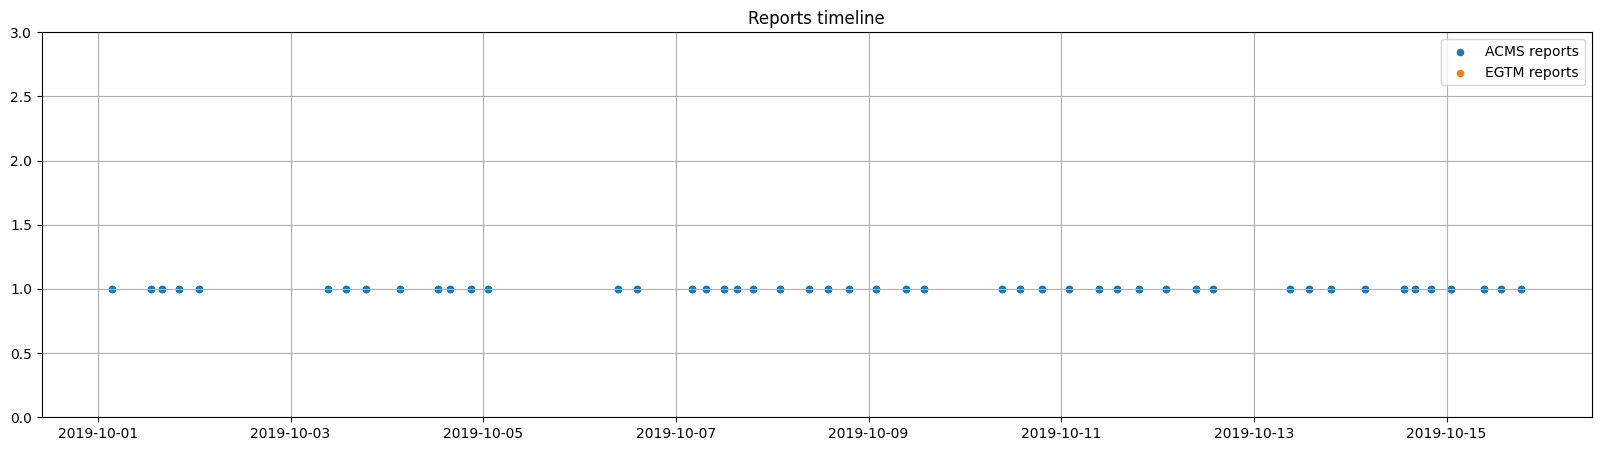

In [39]:
acms_filtered = acms[
    (pd.to_datetime(acms.index).year == 2019) &
    (pd.to_datetime(acms.index).month == 10) &
    (pd.to_datetime(acms.index).day <= 15)  
    # (pd.to_datetime(acms.index).day <= 21)
]

acms_line = acms_filtered.index

egtm_filtered = egtm[
    (pd.to_datetime(egtm.index).year == 2019) &
    (pd.to_datetime(egtm.index).month == 4) & 
    (pd.to_datetime(egtm.index).day <= 15) 
    # (pd.to_datetime(egtm.index).day <= 21) 
]

egtm_line = egtm_filtered.index

fig, ax = plt.subplots(figsize=(20, 5))

ax.scatter(acms_line, y=acms_line.map(lambda _ : 1), s=20)
ax.scatter(egtm_line, y=egtm_line.map(lambda _: 2), s=20)
ax.legend(["ACMS reports", "EGTM reports"])
ax.set_ylim([0, 3])
ax.set_title("Reports timeline")
ax.grid(which='minor', alpha=1)
ax.grid(which='major', alpha=1)
plt.show()

In [33]:
pd.concat([
    pd.Series(acms_line),
    pd.Series(acms_filtered['naiup'].to_numpy(), name='naiup'),
    pd.Series(acms_filtered['pos'].to_numpy()),
    pd.Series(egtm_line),
    pd.Series(egtm_filtered['egtm'].to_numpy(), name='egtm'),
], axis=1)

,reportts,naiup,0,1,egtm
0,2019-10-01 03:33:32,99.7,1,NaN,NaN
1,2019-10-01 03:33:32,126.1,2,NaN,NaN
2,2019-10-01 13:12:23,126.8,2,NaN,NaN
3,2019-10-01 13:12:23,98.8,1,NaN,NaN
4,2019-10-01 16:04:41,97.0,1,NaN,NaN
...,...,...,...,...,...
91,2019-10-15 09:17:28,127.4,2,NaN,NaN
92,2019-10-15 13:36:36,98.5,1,NaN,NaN
93,2019-10-15 13:36:36,125.2,2,NaN,NaN
94,2019-10-15 18:36:42,127.5,2,NaN,NaN


Гипотеза: output параметры вычислялись вскоре после записи input параметров 

In [34]:
def merge_by_date(left: pd.DataFrame, right: pd.DataFrame):
  left.sort_values('reportts', inplace=True)
  right.sort_values('reportts', inplace=True)
  right['reportts_'] = right['reportts'] 

  left = left.drop_duplicates('reportts').set_index('reportts')
  right = right.drop_duplicates('reportts').set_index('reportts')

  right_indexed = \
      right.reindex(left.index, method='ffill').reset_index()
  return pd.merge(left, right_indexed, on=['reportts', 'acnum', 'pos'], suffixes=(None, '_'))

def merge_both_engines(left: pd.DataFrame, right: pd.DataFrame, positions = [1, 2]):
  result = []
  
  for pos in positions:
    left_ = left[(left['pos'] == pos)].copy()
    right_ = right[(right['pos'] == pos)].copy()
    merged = merge_by_date(left_, right_)
    result.append(merged)

  return pd.concat(result, ignore_index=True)


merged = merge_both_engines( 
  egtm.reset_index().rename(columns={'recorded_dt': 'reportts'}),
  acms.reset_index()
)

diff = (merged['reportts'] - merged['reportts_']) \
        .astype('timedelta64[s]').astype('int')

merged_sample = merged[diff < 30]


In [35]:
merged_sample.tail(5)

,index,n1_delt,egtm,n2_delt,reportts,acnum,pos,fltdes,dep,arr,...,tr,ttp,vb1,vb2,vorrc,vorv,votm,vsva,w14,reportts_


Гипотеза верна, и для 1672 записей разница во времени *delta_t = output_t - input_t* составляет не более +30 секунд. Эти записи являются наиболее чистыми данными, которые в дальнейшем я буду использовать для построения baseline-моделей. Есть также небольшая часть данных, для которых delta_t отрицательна. На данный момент эти записи я не включаю в датасет, так как нет уверенности в их корректности. 

Датасет `takeoff-merged-VQ-BGU-30s.csv` будет основным для борта VQ-BGU.

**TODO**: добавить в датасет N1, N2, ETT (?)

**TODO**: аналогичным образом собрать датасет для VQ-BDQ

In [36]:
# merged_sample.drop(columns=['reportts_']) \
#              .to_csv('./takeoff-merged-VQ-BGU-30s-full.csv', index=False)

In [37]:
m = merged_sample
m[(m['reportts'] > '2019-12-19') & (m['reportts'] < '2019-12-20')][
    ['pos', 'reportts_', 'naiup', 'reportts', 'egtm']
]

,pos,reportts_,naiup,reportts,egtm
